In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
print("Shape of gdp_df:", gdp_df.shape)

Shape of gdp_df: (8219, 4)


In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

### Question 5 Answer
**Rows**: 8219 
**Columns**: 4 
**Data Types**: object, int, float

In [6]:
# Drop Value Footnotes

gdp_df = gdp_df.drop(['Value Footnotes'], axis = 1)

In [7]:
# Rename Columns
gdp_df.columns = ['Country','Year','GDP_Per_Capita']

In [8]:
# gdp 2020 variable
gdp_2020 = gdp_df[gdp_df['Year'] == 2020].dropna()

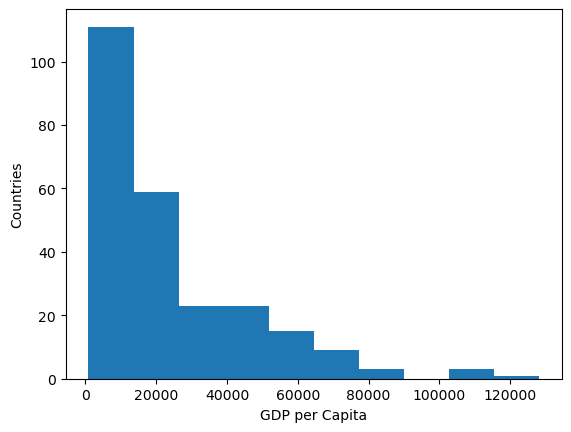

In [9]:
# histogram
plt.hist(gdp_2020['GDP_Per_Capita'])
plt.xlabel('GDP per Capita')
plt.ylabel('Countries')
plt.show()

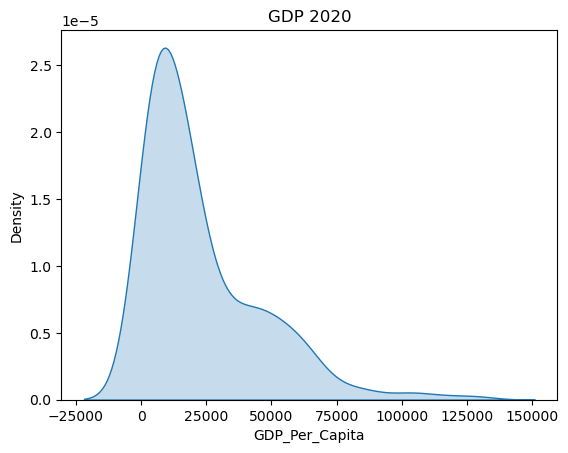

In [10]:
# Density Plot
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill = True)
plt.title("GDP 2020")
plt.show()

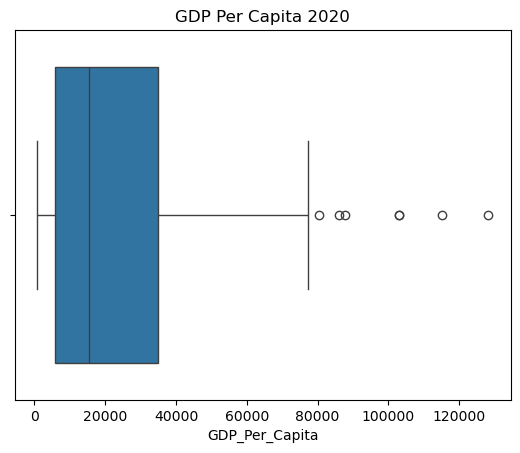

In [11]:
# Box Plot
sns.boxplot(x=gdp_2020['GDP_Per_Capita'])
plt.title("GDP Per Capita 2020")
plt.show()

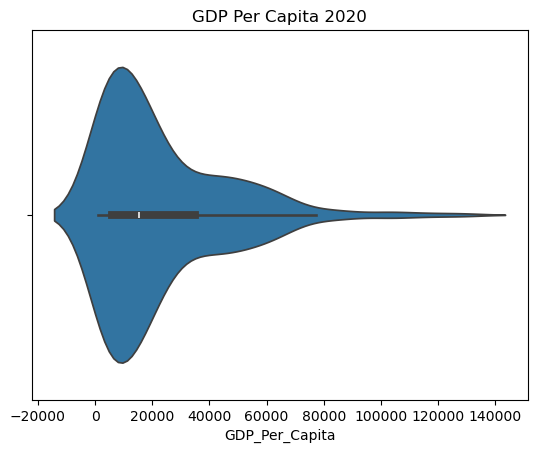

In [12]:
# Violin Plot
sns.violinplot(x=gdp_2020['GDP_Per_Capita'])
plt.title("GDP Per Capita 2020")
plt.show()

In [13]:
# 2020 Median
gdp_2020['GDP_Per_Capita'].median()

15309.23598817024

In [14]:
# Decades Variable
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])].dropna()

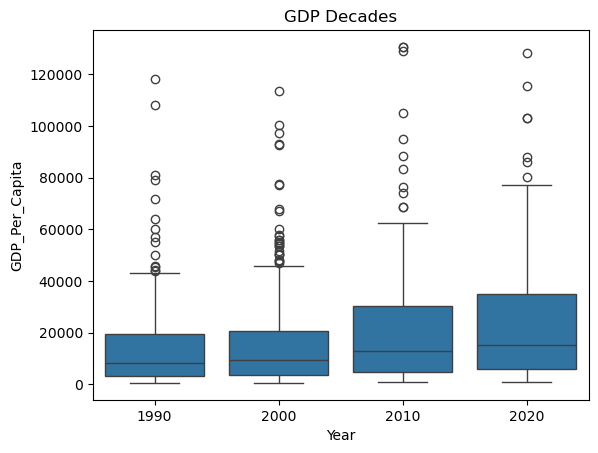

In [15]:
sns.boxplot(x='Year', y='GDP_Per_Capita', data = gdp_decades)
plt.title('GDP Decades')
plt.show()

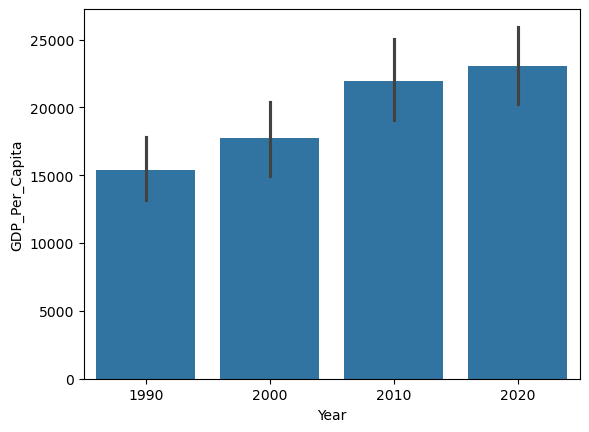

In [16]:
sns.barplot(x = 'Year', y = 'GDP_Per_Capita', data = gdp_decades)
plt.show()

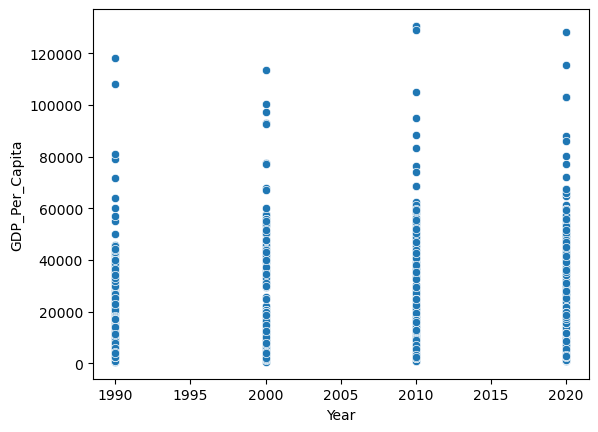

In [17]:
sns.scatterplot(x = 'Year', y = 'GDP_Per_Capita', data = gdp_decades)
plt.show()

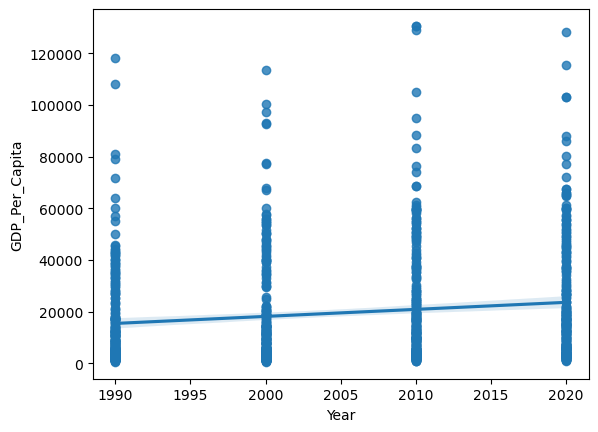

In [18]:
sns.regplot(x = 'Year', y = 'GDP_Per_Capita', data = gdp_decades)
plt.show()

In [19]:
over_100k = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]

first_country = over_100k.sort_values(by = 'Year').head()
print(first_country)

                   Country  Year  GDP_Per_Capita
974                 Brunei  1990   118163.683198
7827  United Arab Emirates  1990   108057.042464
7826  United Arab Emirates  1991   103098.537132
973                 Brunei  1991   118220.683619
972                 Brunei  1992   111457.220910


In [20]:
gdp_2020.sort_values(by='GDP_Per_Capita', ascending=False).head(1)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341


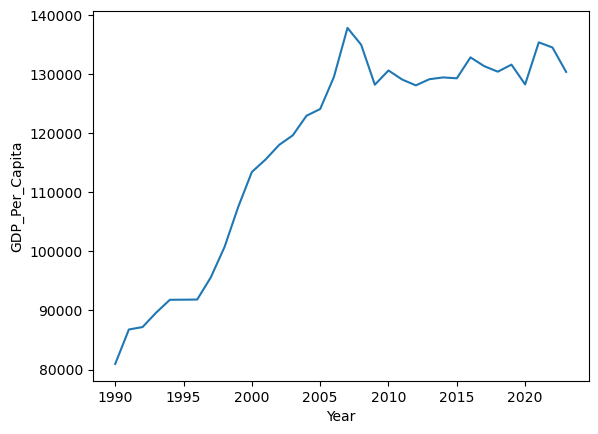

In [21]:
sns.lineplot(data = gdp_df[gdp_df['Country'] == 'Luxembourg'],
            x='Year',
            y='GDP_Per_Capita')
plt.show()

In [22]:
gdp_2020.sort_values(by='GDP_Per_Capita').head()

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765


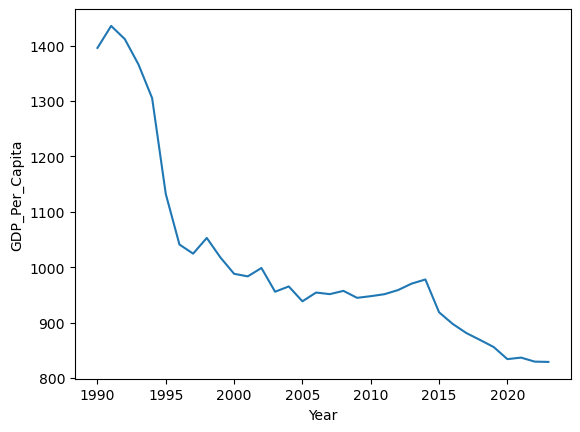

In [23]:
sns.lineplot(data = gdp_df[gdp_df['Country'] == 'Burundi'],
             x = 'Year',
             y = 'GDP_Per_Capita')
plt.show()

In [50]:
#internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines = 'skip')
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)

In [51]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [52]:
internet_df.head()
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


In [53]:
type(internet_df)

pandas.core.frame.DataFrame

In [56]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [57]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [58]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [59]:
first_nonzero_year = internet_df[internet_df['Internet_Users_Pct'] > 0]['Year'].min()
print(first_nonzero_year)

1990


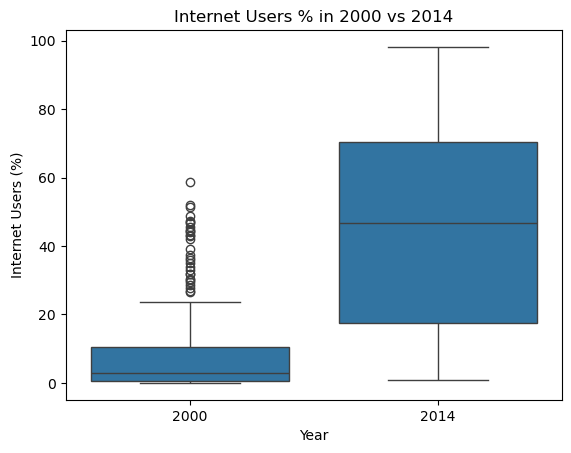

In [58]:
compare_years = internet_df[internet_df['Year'].isin([2000, 2014])]
sns.boxplot(x='Year', y='Internet_Users_Pct', data=compare_years)
plt.title("Internet Users % in 2000 vs 2014")
plt.ylabel("Internet Users (%)")
plt.show()

In [61]:
countries_below_5pct = internet_df[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'] < 5)]
countries_below_5pct.shape

(10, 3)

In [60]:
print(gdp_df.dtypes)
print(internet_df.dtypes)

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object
Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object


In [62]:
print(internet_df.columns)

Index(['Country', 'Year', 'Internet_Users_Pct'], dtype='object')
